
# Genetic Algorithm and its Application in Data Science


## Introduction

This tutorial will introduce the genetic algorithm(GA) and its application in data science problems such as the famous travelling saleman problem(TSP). First, we are going to present GA's origin and concept. Then we will go through the genetic algorithm step by step, taking the travelling saleman problem as example. Furthermore, we will try different dataset and visualize the problem solving process of GA. Finally we will conclude with some other Data Science problem that GA can solve and talk about the future application of GA.


### Tutorial content

In this tutorial, we will show how to implement genetic algorithm in Python to solve Data Science problems like  travelling saleman problem, and visulize the problem solving process to understand it better, specifically using [Numpy](http://www.numpy.org), [geonamescache](https://pypi.python.org/pypi/geonamescache), and [matplotlib](https://matplotlib.org).

We will cover the following topics in this tutorial:
- [Installing the libraries](#Installing-the-libraries)
- [Intro to Genetic Algorithm](#Intro-to-Genetic-Algorithm)
- [Example application: Travelling Salesman Problem](#Example-application:-Travelling-Salesman-Problem)
- [Visualization](#Visualization)
- [Summary and references](#Summary-and-references)

## Installing the libraries

Before getting started, you'll need to install the various libraries that we will use. 

You can install matplotlib, Numpy, geonamescache using pip(if you use anaconda, you only need to install geonamescache as the other two have been installed by default).

$ pip install --upgrade geonamescache numpy matplotlib

then, you need to import those libraries

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import geonamescache

## Intro to Genetic Algorithm

### Origin of Genetic Algorithm

As its name shows, the genetic algorithm is inspired by biological knowledge. As we all known, cells are the basic building block of all living things. Creature is constructed by cells, inside the cell, there is a set of chromosomes, basically, they are the strings of DNA. Those DNA controls the behavior of the creature and the nature will select the creatures adapting to the environments. Generation by generation, the optimal DNA strings will last and the insutable ones will no longer exist, this is also call "Natural selection", proposed by Darwin.

### What is Genetic Algorithm
Inspired by this idea, we figure out a way to generate high-quality solutions to optimization and search problems by relying on bio-inspired operators such as mutation, crossover and selection. Although you may also  hear the biological terminology in your biology class. Here we would like to introduce them again under the context of Genetic Algorithm.

#### General Idea

![ga_steps](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/07/22154007/steps.png)

As the graph above shows, there are five primary terminology we need to know in the genetic algorithm, before going though them on by one, let's see how we design genetic algorithm to solve/optimize our problems.

In a genetic algorithm, a population of candidate solutions(population in natual selection) to an optimization problem is evolved toward better solution(this process is also call evolution). Each candidate solution(individual) has a set of properties (its DNA) which can be mutated and altered; traditionally, solutions are represented in binary strings of 0 and 1. 

The evolution usually starts from a population of randomly generated individuals and then jump into evolution process. It is an iterative process, each iteration we call it a generation; In each generation, the fitness of every individual in the population is evaluated; the fitness is usually the value of the objective function in the optimization problem being solved. The more fit individuals are stochastically selected from the current population, and each individual's DNA is modified (recombined/Crossover and randomly mutated) to form a new generation. The new generation will be used in the next iteration of the algorithm. We usually well set the maximum number of generations to stop the algotirhm and get our solution for the optimization problems.

Now let's jump into those processes in detail.

#### Initialization
Commonly, We generate the initial population randomly, and the population size depends on the nature of the problem,  typically contains several hundreds or thousands of possible solutions.

#### Fitness assignment

We design a fitness fuction to evaluate every individual in the current popustion, the choice fitness fuction depends on the optimization problem.

#### Selection
A portion of the existing population is selected to breed a new generation, usually we will select thoese individual with better fitness(adapt to the nature better), but since we don't want to eliminate those potential ones, we also include some of them stochastically. So this step select the parent population that will produce off-springs for the next generation.

#### Crossover

this process corresponds to the recombination of genes in natural selection. We stochastically swap part of the gene(DNA string) between the individuals in the parent population we selected in the previous step. 

#### Mutation

Think in the biological sense, are the off-springs have the same traits as their parents? No, so we would like to imitate this process which is call mutation. In this process, we randomly "mutate" the gene(DNA string) in each of the individuals in the parent population we selected. Notice that this process happen after Crossover, just like the parents give birth to their baby and the baby could be different from both of parents.

#### Wrap up
the following graph vividly indicates the iteration of the genetic algorithm， if an individual wants to thrive, it must imporve by itself constantly, it's the suvivral of fitness. And the best population should inspire the next genreation, at the same time the potantial individuals are also considered to maintain diversity so that the whole population could adapt to the variation of the natural environment.

![wrap up](https://s3-ap-south-1.amazonaws.com/av-blog-media/wp-content/uploads/2017/07/22175311/gadiagram.png)

So this is the general idea of the genetic algorithm. So now let's look at the application of genetic algorithm in data science.


## Example application: Travelling Salesman Problem

The travelling salesman problem (TSP) is an [NP-hard](https://en.wikipedia.org/wiki/NP-hard) problem in combinational optimization, it asks such a question: "Given a list of cities and the distances between each pair of cities, what is the shortest possible route that visits each city and returns to the origin city?"

In this tutorial we would not dive deeply into the provement of why TSP is a NP-hard problem. We only need to know this is a optimization problem and Genetic Algorithm will help us to find out a "good-enough" solution to the TSP surprisingly quickly.

Finding a solution to the travelling salesman problem requires we set up a genetic algorithm in a specialized way. Now let's implement our GA for the TSP step by step:

### Data Processing

Firstly we should build up our TSP model and fetch some real data for our Genetic Algorithm, in this tutorial, we would like to use the 48 capitals in United States as an example. As we have already installed the geonamescache library, which will provide us the longitude and latitude location information for cities, we could fetch our list of capitals from it. We get our list of name of capitals in US from [WIKI](https://en.wikipedia.org/wiki/List_of_capitals_in_the_United_States) as file capitals.txt and then use geonamescache to extract the corresponding location info. In this way, we obtain the coordinates of all capitals in US. 

In [28]:
gc = geonamescache.GeonamesCache()
c = gc.get_cities()             
 
# extract the US city names and coordinates
US_cities = {c[key]['name'] : (c[key]['latitude'], c[key]['longitude']) 
             for key in list(c.keys())
             if c[key]['countrycode'] == 'US' }

# construct a list of coordinates of capitals, it's a N x 2 narray
capital_position = []
with open("capitals.txt", "r") as f:    
    for line in f:
        line = line.strip().split(",")
        try:
            coord = US_cities[line[0]]
            print coord
            capital_position.append([coord[0], coord[1]]);
        except KeyError, e:
            continue 
    capital_position = np.array(capitals)

(32.36681, -86.29997)
(58.30194, -134.41972)
(33.44838, -112.07404)
(38.58157, -121.4944)
(39.73915, -104.9847)
(43.19786, -70.87367)
(30.43826, -84.28073)
(33.749, -84.38798)
(21.30694, -157.85833)
(43.6135, -116.20345)
(39.92423, -83.80882)
(39.76838, -86.15804)
(39.04833, -95.67804)
(38.20091, -84.87328)
(44.31062, -69.77949)
(38.97845, -76.49218)
(42.35843, -71.05977)
(42.73253, -84.55553)
(39.7765, -74.86238)
(33.29622, -86.8436)
(40.8, -96.66696)
(42.46037, -71.34895)
(42.13949, -83.17826)
(37.88687, -122.29775)
(35.7721, -78.63861)
(46.80833, -100.78374)
(39.96118, -82.99879)
(44.9429, -123.0351)
(40.2737, -76.88442)
(41.82399, -71.41283)
(38.95171, -92.33407)
(36.16589, -86.78444)
(30.26715, -97.74306)
(37.93576, -122.34775)
(47.03787, -122.9007)
(39.49615, -88.17615)
(40.75982, -74.4171)
(41.13998, -104.82025)


### Implement GA for TSP

As we mentioned above, we need to set up a genetic algorithm in a specialized way.

#### Initialization
firstly, we label each line of input with an index number, then use a sequence of indexes to represent a valid solution, for example, "1, 3, 2" means from city 1 to city 3, and then go to city 2.

And we should also make sure no duplicated number in this solution sequece as we want to find out a path going through every city once. Thus in the initialzation, we only need to generate a random permutation for each individual in the population.

#### Fitness assignment

For the fitness function(evalution function), we simply compute the total distance of the path, and use the reciprocal of it as the fitness. Obviously, the shorter the path is, the better its fitness is.

#### Selection

Selection for TSP is straightforward, the more fitness, the higher probability that the corresponding individual is chosen. In this way, we not only consider more about the best individuals, but also give a glance at those individuals who don't perform well in the current population as part of their DNAs might be benight. 


#### Crossover and Mutation

After the selection, we do some "breading" operation to thoese selected individuals, here we should be carefully about the DNA stribg mixing. As we have mentioned before, the path solution should be a sequence without duplication. Therefore, when we do Crossover, we extract the selection portion of DNA string of one of the parents and put it to the leftmost part of the DNA string of the offspring, then fill the rest of DNA string with the remain DNA string in its original order of the other parents.

For example, 

parent A: [0, 1, 2, 3]
parent B: [1, 2, 0, 3]

firstly we choose two element of the DNA string like [2, 3, _ , _] as the DNA string for the child C
then we fill the empty part with the remain DNA in A with the order in B, so now child C's DNA stirng is [2, 3, 1, 0]. (1, 0 is in the order of their relative position in parent B).

For the Mutation, we simply randomly swap paticular elements in the DNA string, which means we swap the order of the two cities.

#### Wrap up
So that's all the things we should consider in the initialzation and iteration of our Genetic Algorithm for TSP, now let's have a look at our GA implementation in Python:

In [29]:
class GA(object):
    def __init__(self, dna_size, cross_rate, mutation_rate, pop_size, ):
        self.dna_size = dna_size
        self.pop_size = pop_size
        self.cross_rate = cross_rate
        self.mutate_rate = mutation_rate
        # initialization
        self.pop = np.vstack([np.random.permutation(dna_size) for _ in range(pop_size)])

    def assign_fitness(self, coord_x, coord_y):
        distance = np.empty((self.pop_size,), dtype=np.float64)
        for i, (xs, ys) in enumerate(zip(coord_x, coord_y)):
            distance[i] = np.sum(np.sqrt(np.square(np.diff(xs)) + np.square(np.diff(ys))))
        fitness = 1 / distance
        return fitness, distance

    def select(self, fitness):
        idx = np.random.choice(np.arange(self.pop_size), size=self.pop_size, replace=True, p= fitness / fitness.sum())
        return self.pop[idx]

    def crossover(self, parent, pop):
        if np.random.rand() < self.cross_rate:
            i = np.random.randint(0, self.pop_size, size=1)                        
            cross_points = np.random.randint(0, 2, self.dna_size).astype(np.bool)
            keep_cities = parent[~cross_points]                                      
            swap_cities = pop[i, np.isin(pop[i].ravel(), keep_cities, invert=True)]
            parent[:] = np.concatenate((keep_cities, swap_cities))
        return parent

    def mutate(self, child):
        for point in range(self.dna_size):
            if np.random.rand() < self.mutate_rate:
                swap_point = np.random.randint(0, self.dna_size)
                swapA, swapB = child[point], child[swap_point]
                child[point], child[swap_point] = swapB, swapA
        return child

    def evolve(self, fitness):
        pop = self.select(fitness)
        pop_copy = pop.copy()
        for parent in pop:
            child = self.crossover(parent, pop_copy)
            child = self.mutate(child)
            parent[:] = child
        self.pop = pop

     #helper function for getting the coordinates of cities
    def get_city_coordinates(self, DNA, capital_position):
        coord_x = np.empty_like(DNA, dtype=np.float64)
        coord_y = np.empty_like(DNA, dtype=np.float64)
        for i, d in enumerate(DNA):
            city_coord = capital_position[d]
            coord_x[i, :] = city_coord[:, 0]
            coord_y[i, :] = city_coord[:, 1]
        return coord_x, coord_y

In [30]:
# run the algorithm in 200 generation every 10 generation we print the path sum

# setting the parameter for GA
GENERATIONS = 200
CROSS_RATE = 0.1
MUTATE_RATE = 0.02
DNA_SIZE = len(capital_position)
POP_SIZE = 500

ga = GA(dna_size=len(capital_position), cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)

for generation in range(GENERATIONS):
    lx, ly = ga.get_city_coordinates(ga.pop, capital_position)
    fitness, distance = ga.assign_fitness(lx, ly)
    ga.evolve(fitness)
    best_idx = np.argmax(fitness)
    if generation % 10 == 0:
        print('generation: ', generation, ' distance: ',  distance[best_idx])



('generation: ', 0, ' distance: ', 700.65133367873568)
('generation: ', 10, ' distance: ', 661.11794243460588)
('generation: ', 20, ' distance: ', 655.00084241089041)
('generation: ', 30, ' distance: ', 642.65565285429591)
('generation: ', 40, ' distance: ', 650.82339988091246)
('generation: ', 50, ' distance: ', 670.47367369099948)
('generation: ', 60, ' distance: ', 634.63029439856336)
('generation: ', 70, ' distance: ', 565.00865041905058)
('generation: ', 80, ' distance: ', 586.58715858198025)
('generation: ', 90, ' distance: ', 588.34102911623927)
('generation: ', 100, ' distance: ', 582.1485837050086)
('generation: ', 110, ' distance: ', 598.82563141599235)
('generation: ', 120, ' distance: ', 613.41009232763577)
('generation: ', 130, ' distance: ', 563.07907165642951)
('generation: ', 140, ' distance: ', 622.36732119954058)
('generation: ', 150, ' distance: ', 575.57412438408983)
('generation: ', 160, ' distance: ', 589.77726084378151)
('generation: ', 170, ' distance: ', 605.30

## Visualization

Now let's use matplotlib to help us plot the path in the graph, by using the plt.ion() and plt.ioff() functions we could show a dyncamic effect of the path planing.

Firstly let's define the function to plot one individual's DNA(Path), we have already label each city with its corresponding index, so we could plot the path by seaching for the coordinates of cities and plotting them. Here is the function for plotting one path:

In [31]:
def plotting(lx, ly):
        plt.cla()
        plt.scatter(capital_position[:, 0].T, capital_position[:, 1].T, s=25, c='k')
        plt.plot(lx.T, ly.T, 'b-') 
        plt.pause(1)

Now let's add plotting to our GA's evolution, this will generate the path plot every 0.01 second

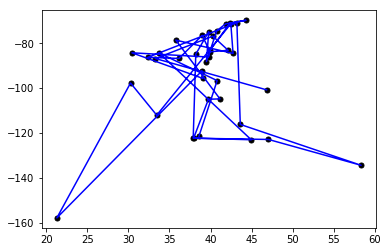

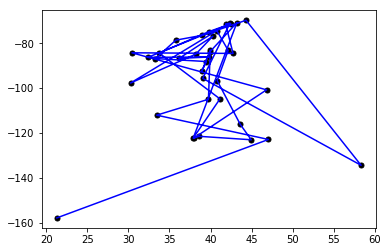

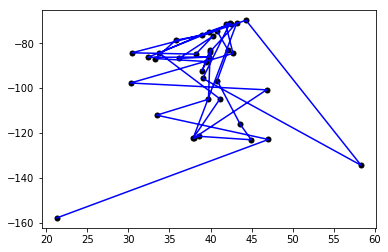

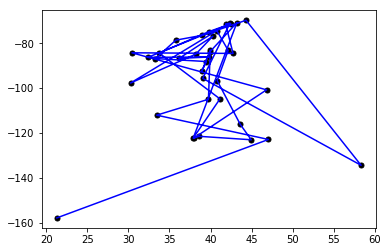

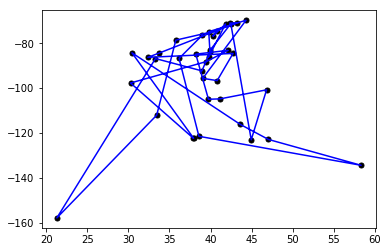

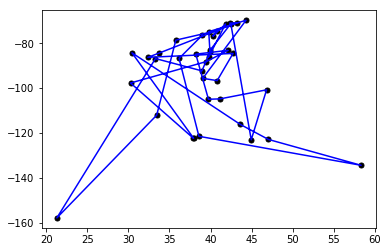

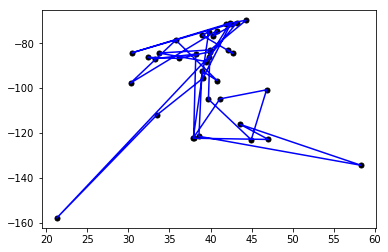

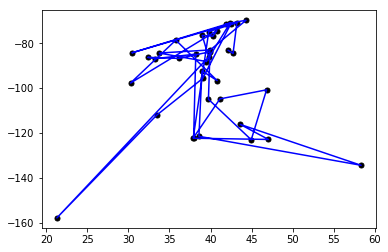

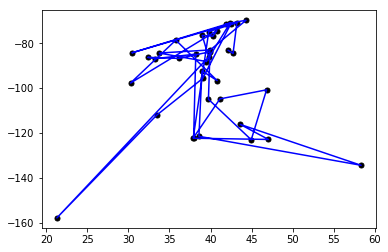

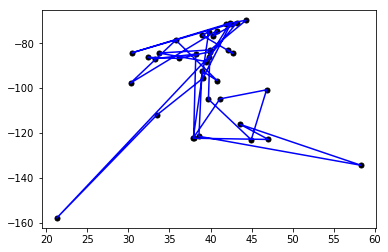

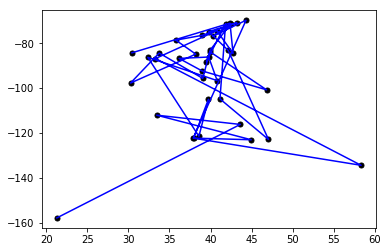

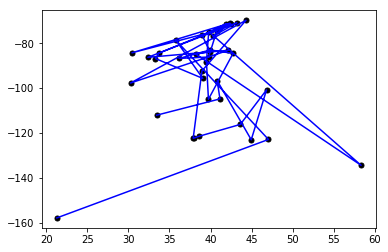

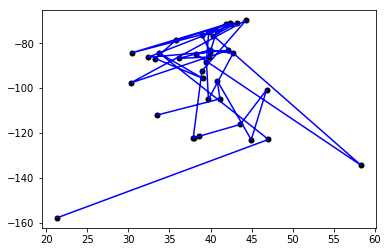

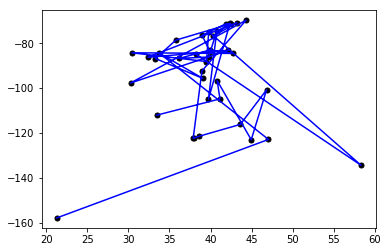

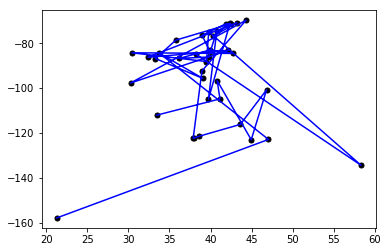

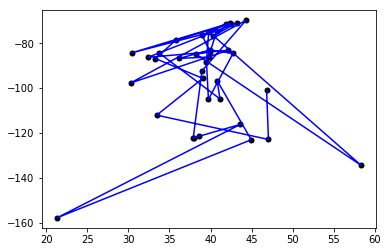

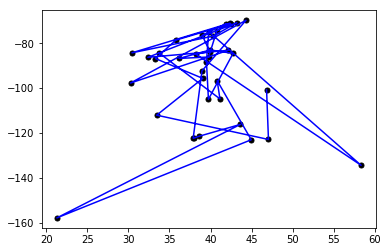

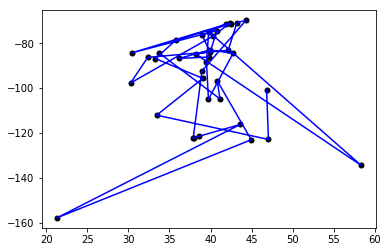

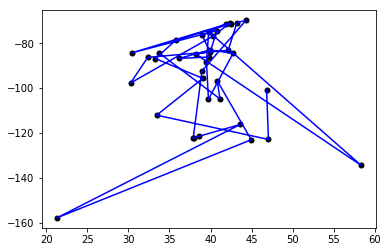

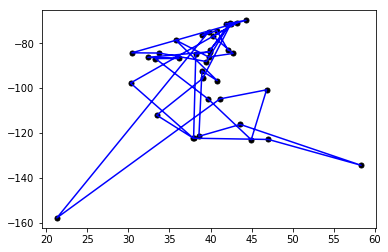

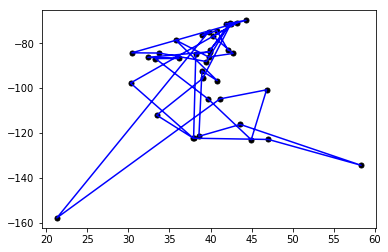

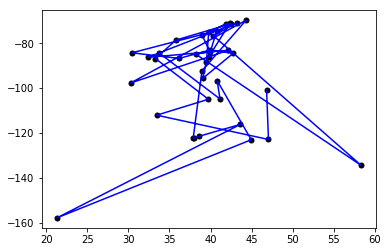

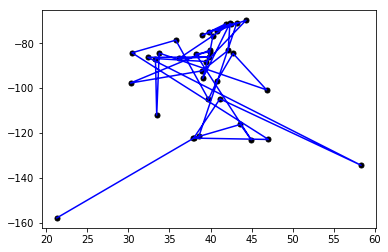

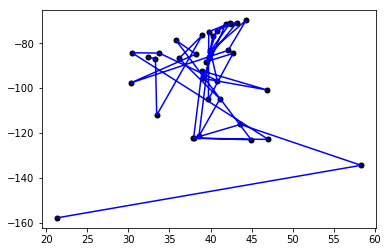

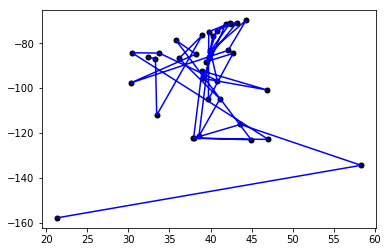

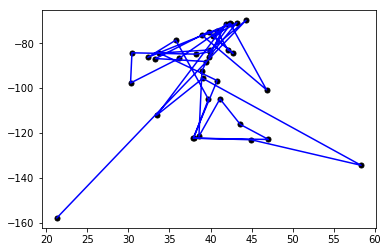

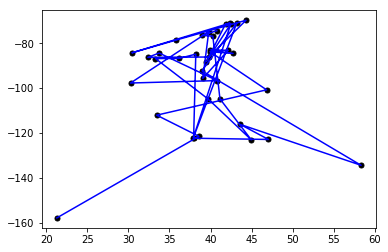

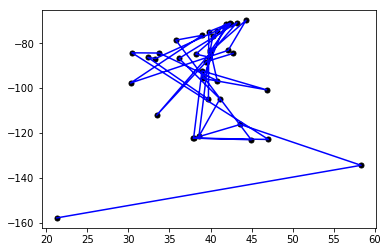

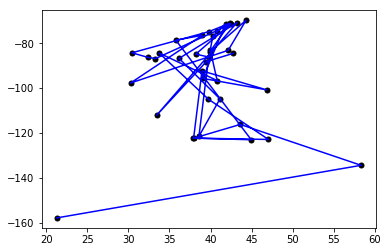

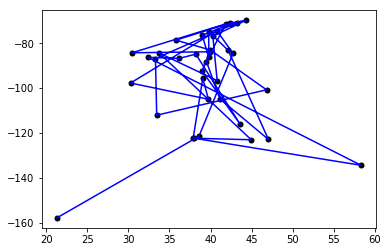

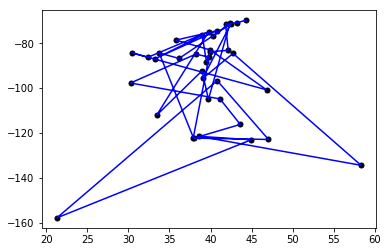

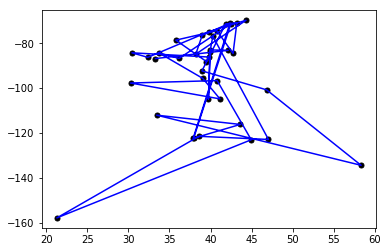

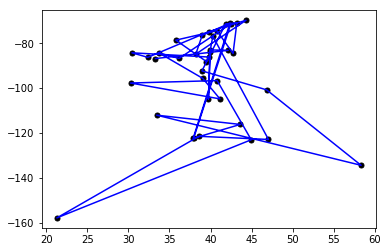

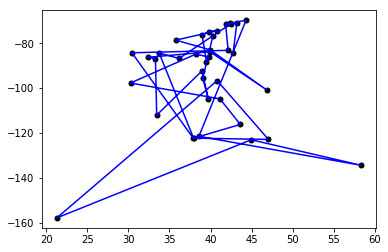

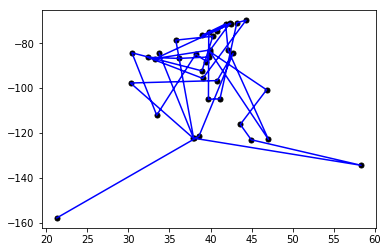

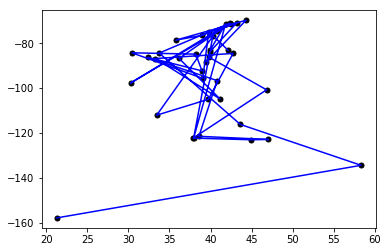

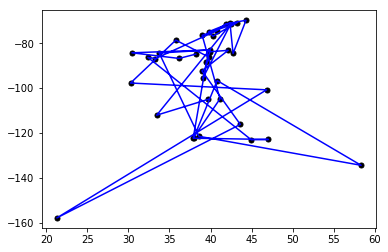

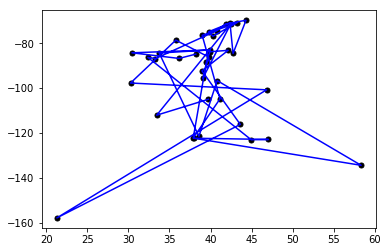

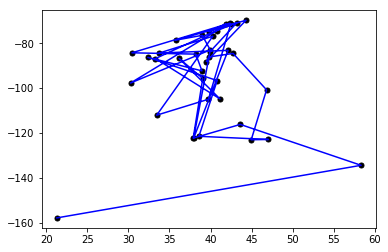

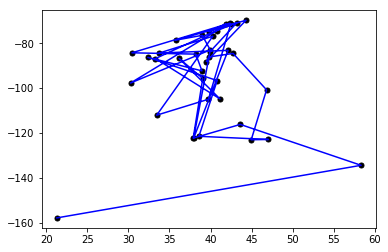

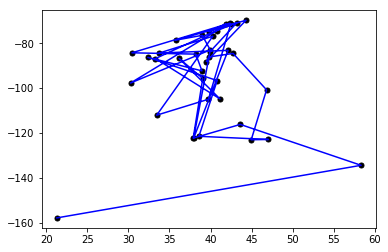

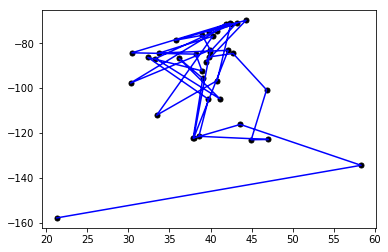

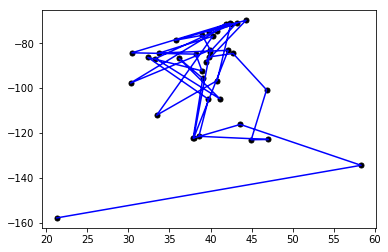

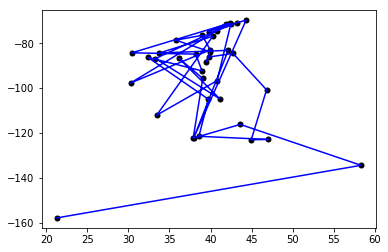

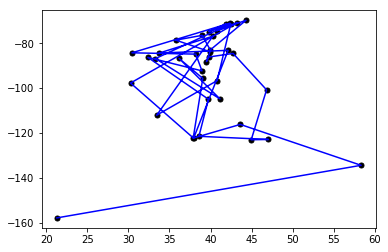

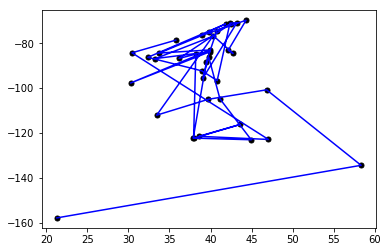

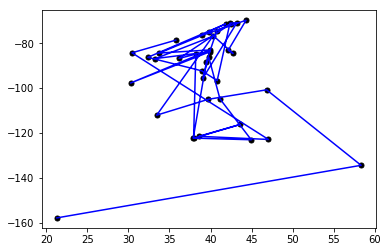

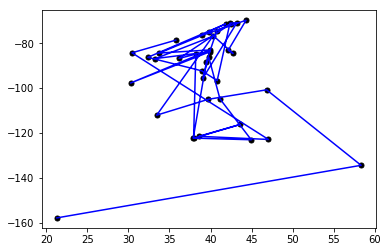

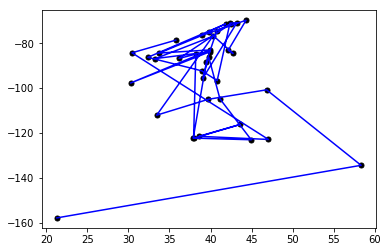

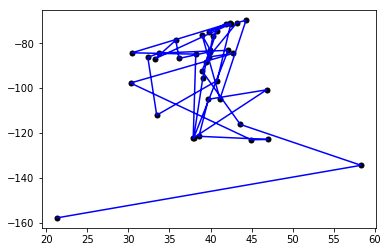

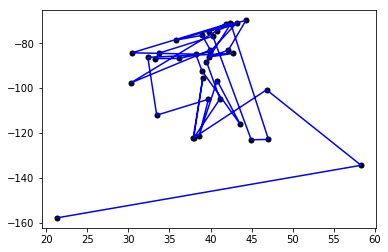

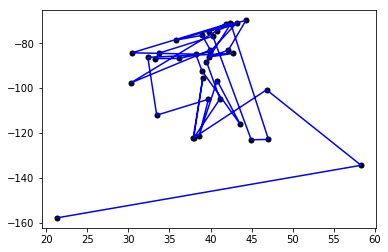

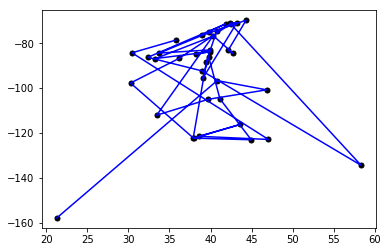

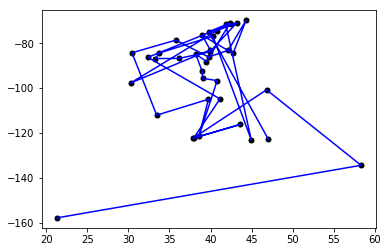

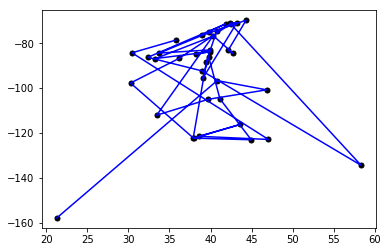

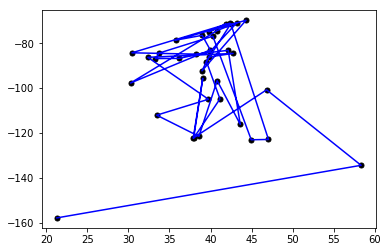

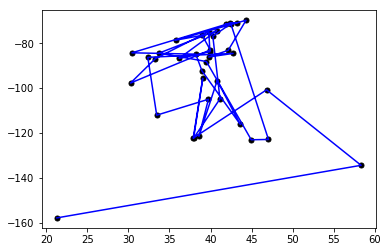

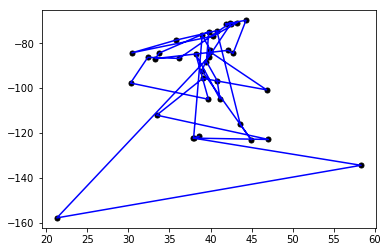

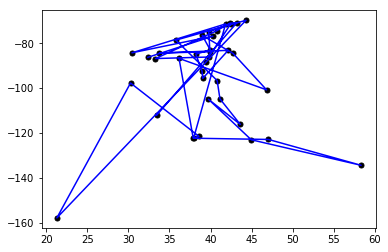

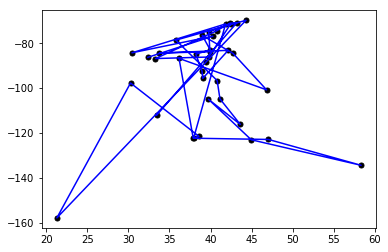

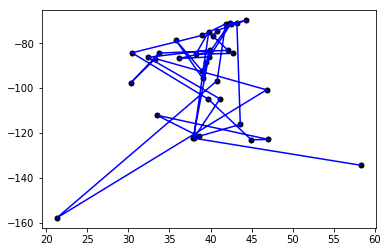

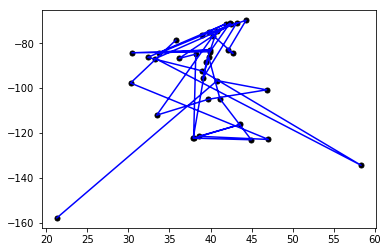

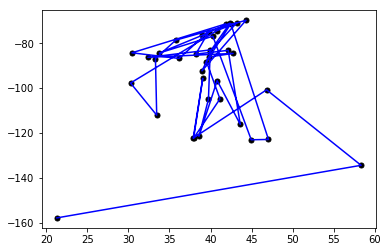

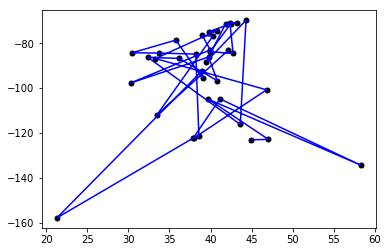

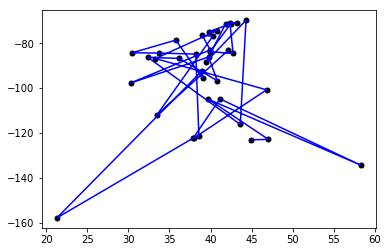

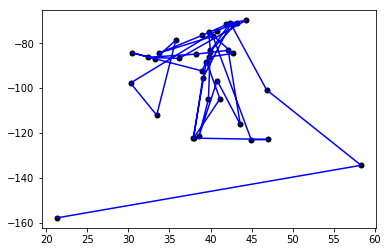

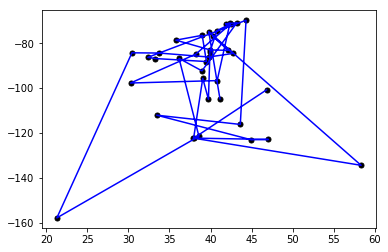

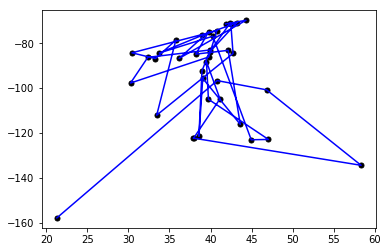

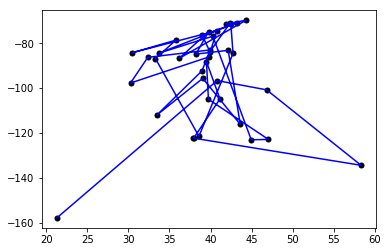

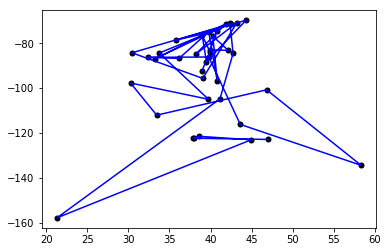

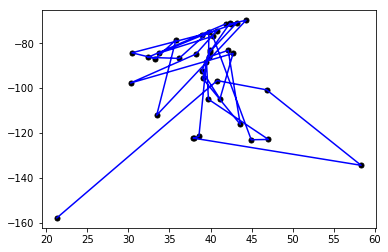

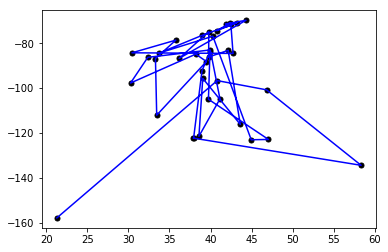

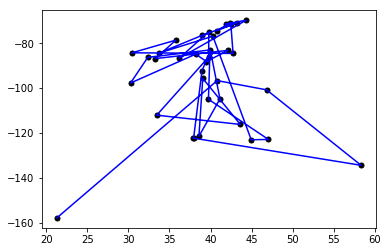

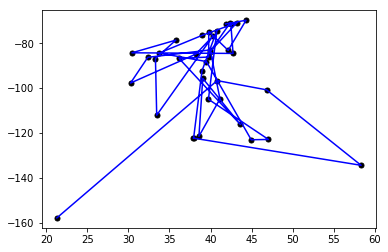

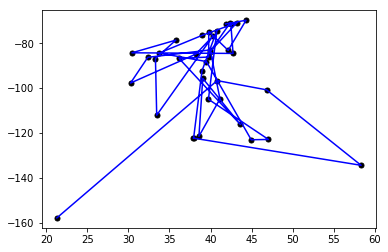

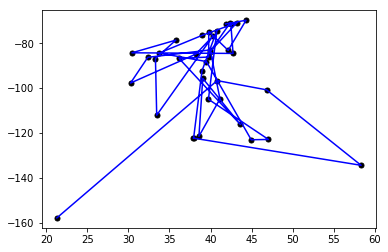

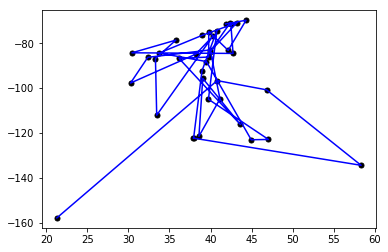

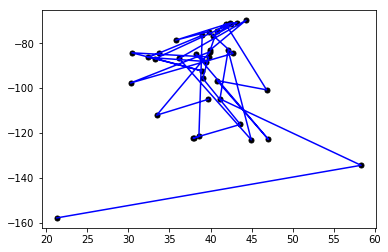

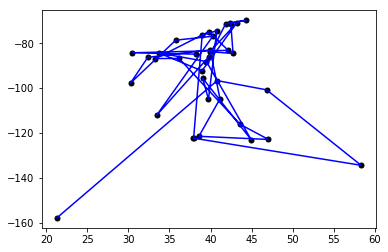

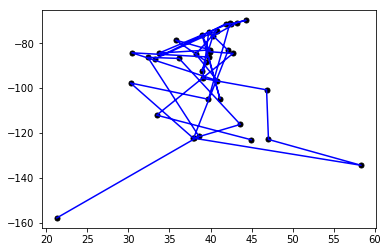

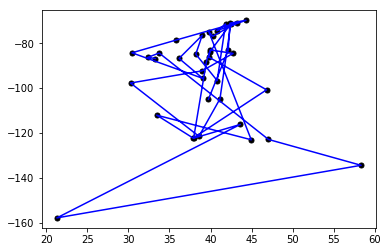

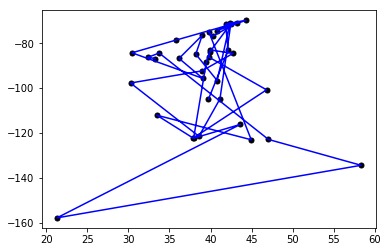

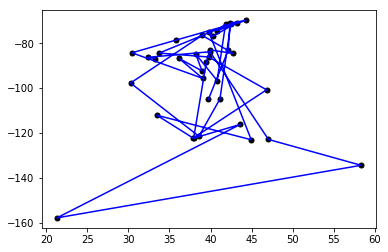

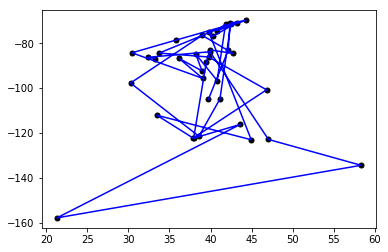

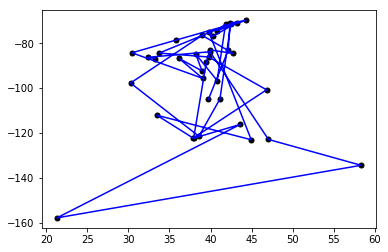

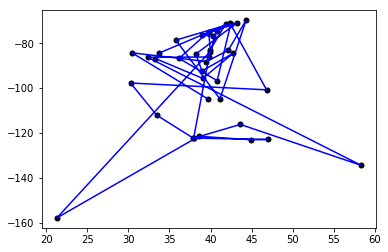

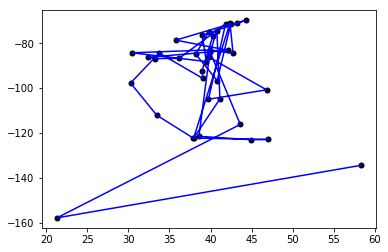

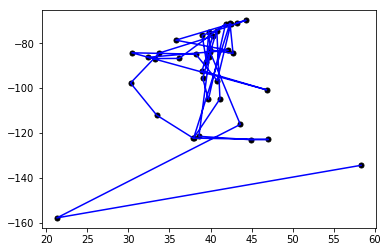

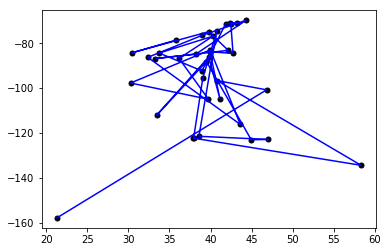

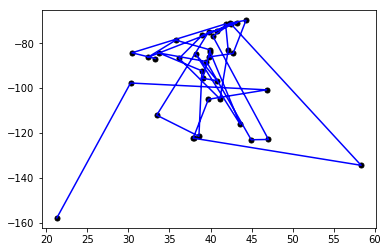

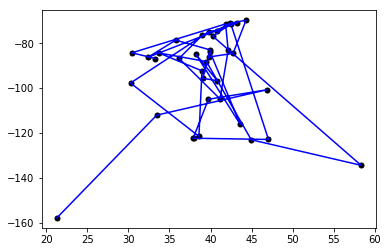

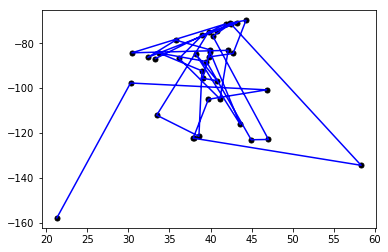

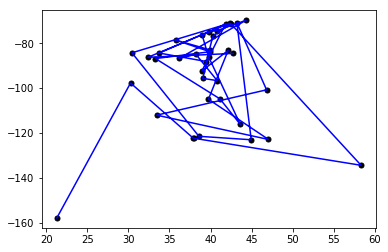

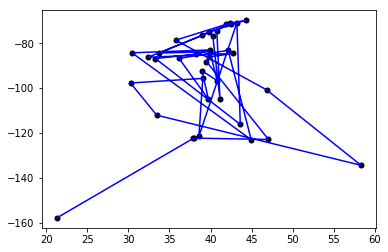

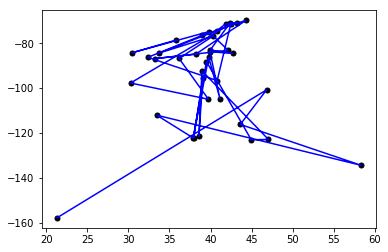

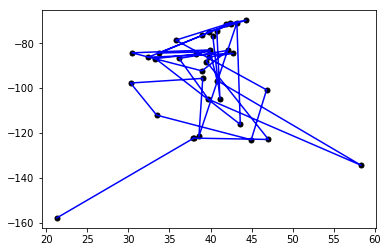

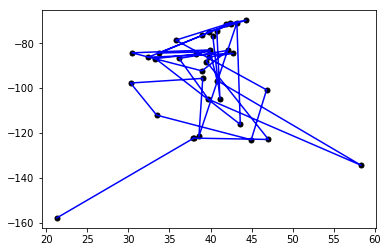

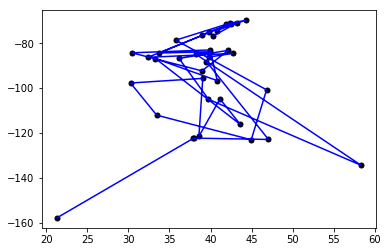

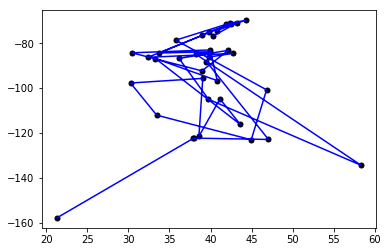

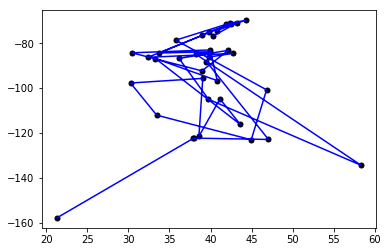

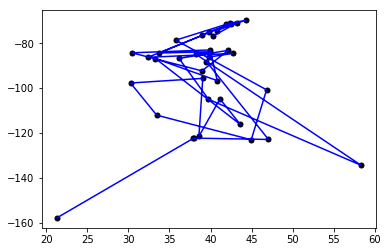

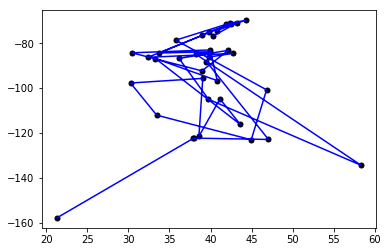

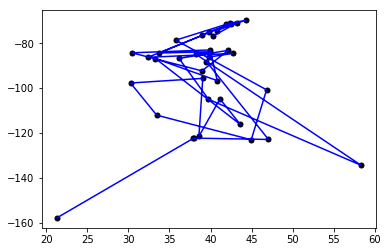

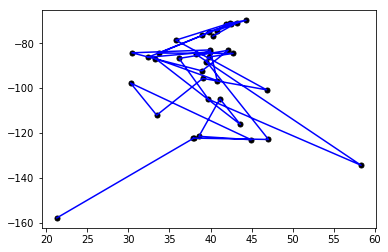

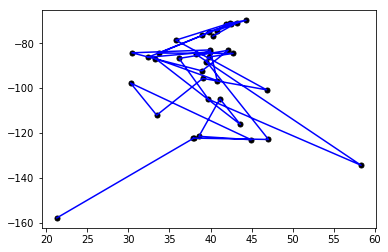

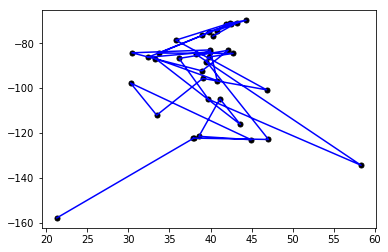

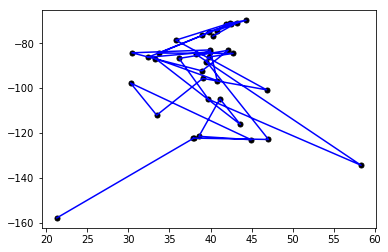

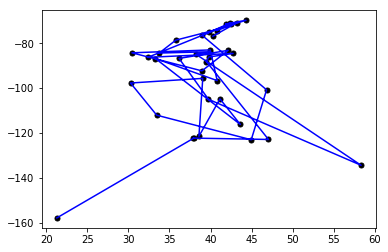

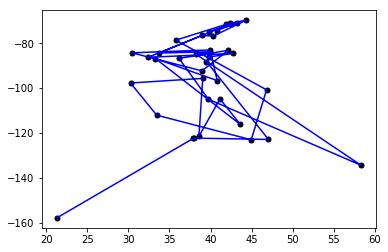

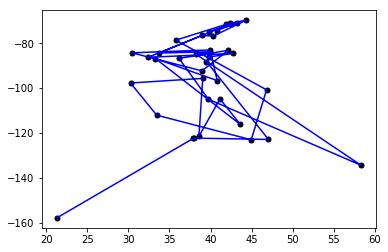

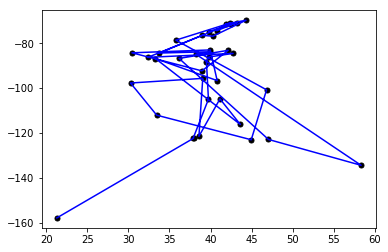

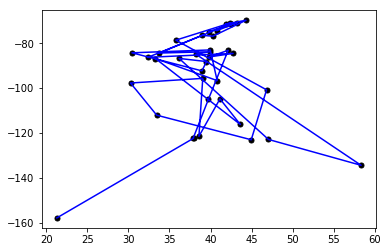

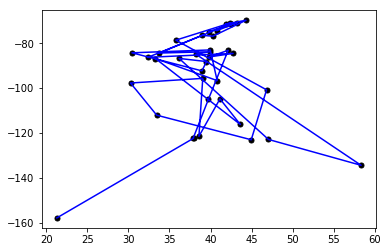

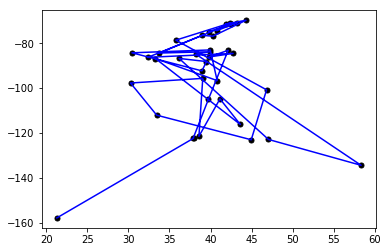

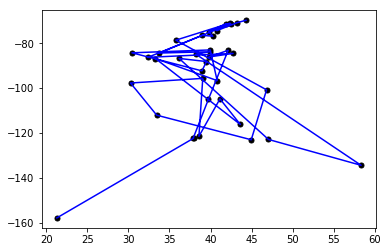

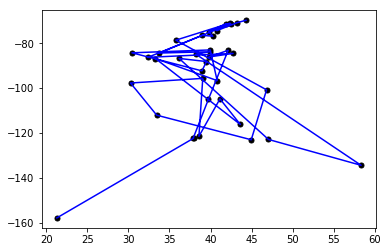

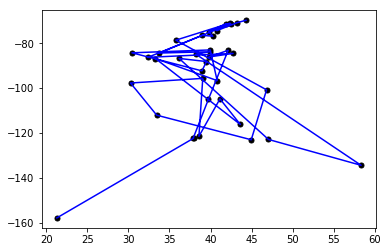

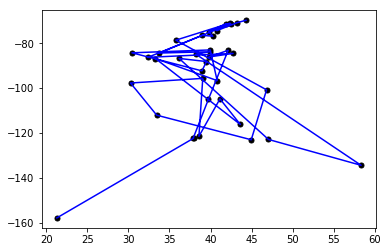

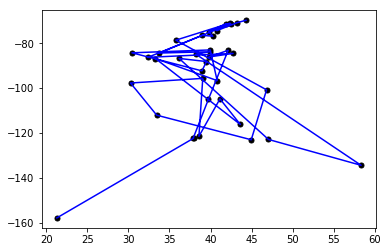

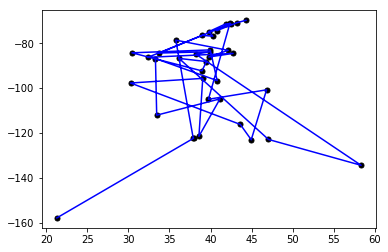

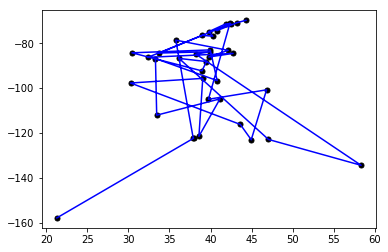

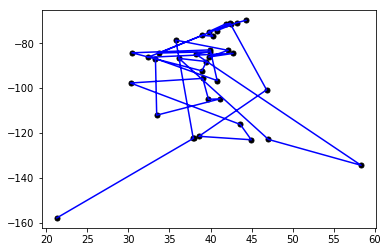

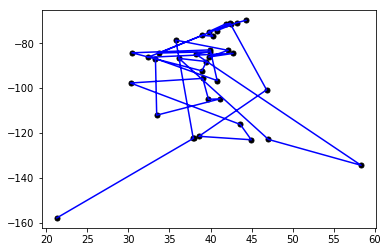

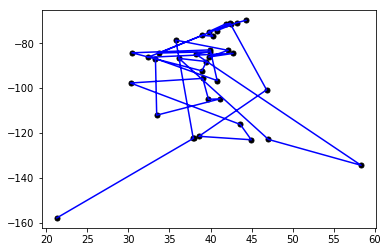

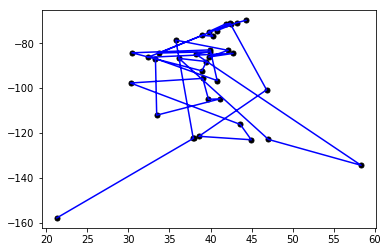

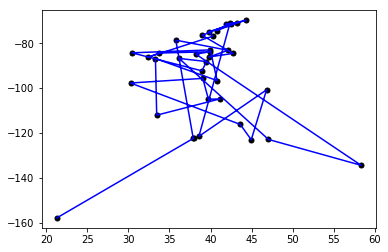

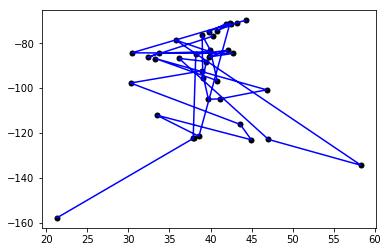

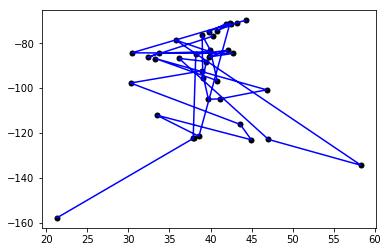

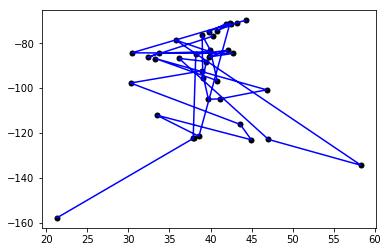

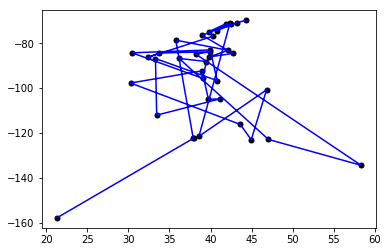

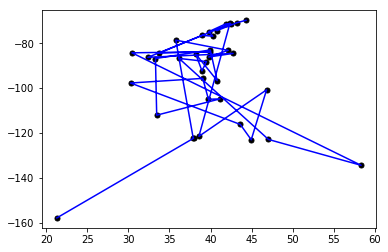

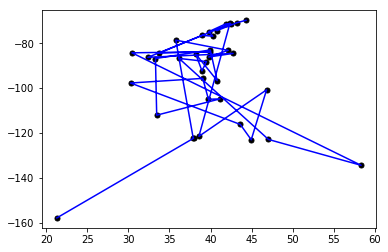

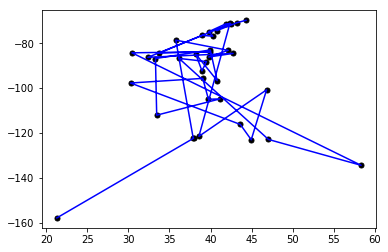

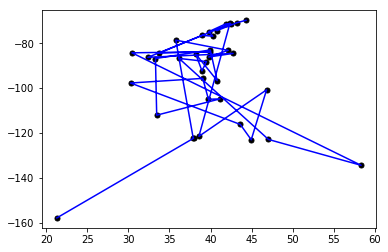

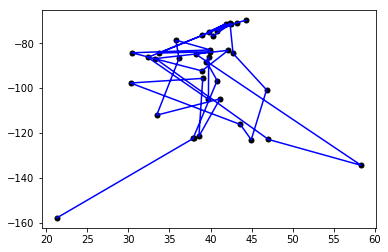

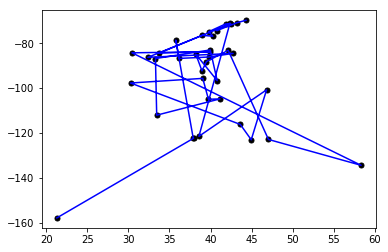

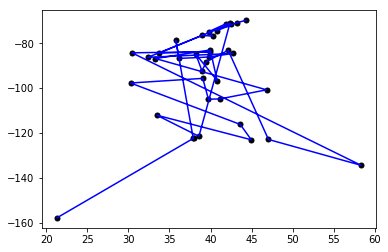

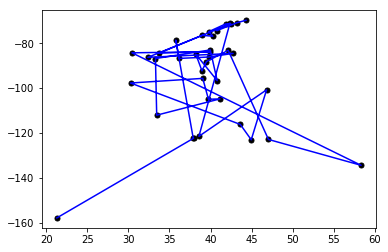

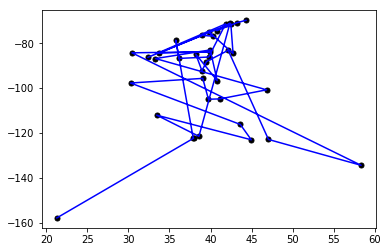

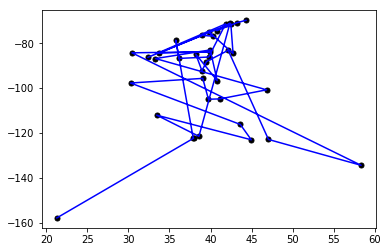

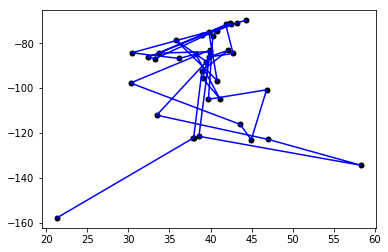

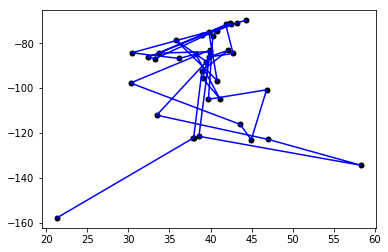

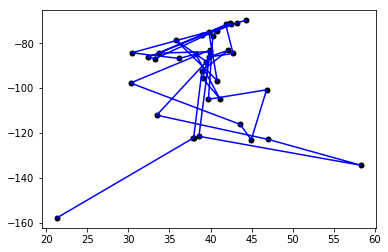

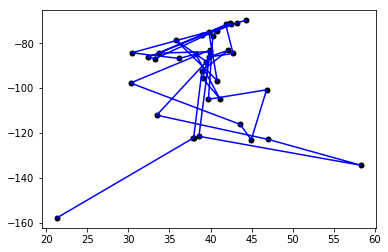

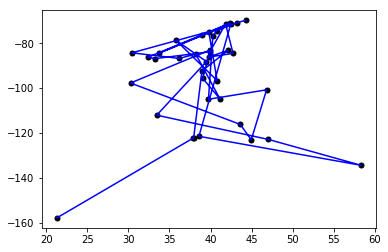

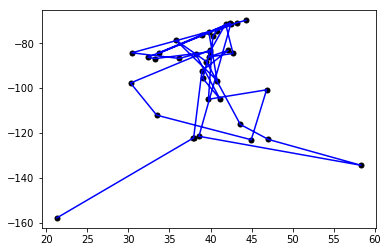

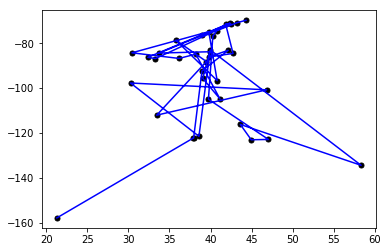

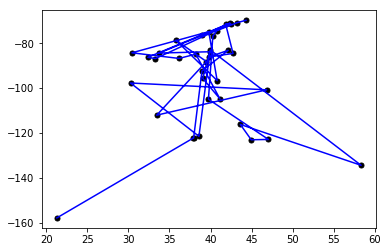

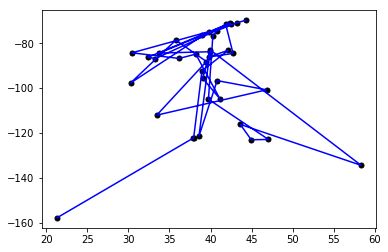

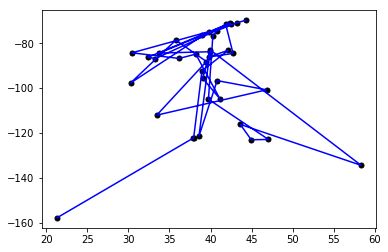

In [32]:
# setting the parameter for GA
GENERATIONS = 200
CROSS_RATE = 0.1
MUTATE_RATE = 0.02
DNA_SIZE = len(capital_position)
POP_SIZE = 300

ga = GA(dna_size=len(capital_position), cross_rate=CROSS_RATE, mutation_rate=MUTATE_RATE, pop_size=POP_SIZE)

plt.ion()

for generation in range(GENERATIONS):
    lx, ly = ga.get_city_coordinates(ga.pop, capital_position)
    fitness, distance = ga.assign_fitness(lx, ly)
    ga.evolve(fitness)
    best_idx = np.argmax(fitness)
    if generation % 10 == 0:
        print('generation: ', generation, ' distance: ',  distance[best_idx])
    plotting(lx[best_idx], ly[best_idx])

plt.ioff()
plt.show()

## Summary and references

Genetic Algorithm is really powerful and efficent for optimization problem in Data Science, in this tutorial we learn What is GA and How to implement it using the Travelling Salesman Problem as example. And we also visualize the solution we find in TSP to get a better understander of the mechanism of GA. In fact, Genetic Algorithm can be used for path searching under complex geographic terrain , commercial planning and so many other problem in different fileds. We believe that the future application in Data Science of Genetic Algorithm will be broader and broader!

1. Genetic algorithm - Wikipedia:https://en.wikipedia.org/wiki/Genetic_algorithm#Optimization_problems
2. Was Darwin a Great Computer Scientist?: https://blog.sicara.com/getting-started-genetic-algorithms-python-tutorial-81ffa1dd72f9
3. Numpy http://www.numpy.org
4. geonamescache https://pypi.python.org/pypi/geonamescache
5. matplotlib https://matplotlib.org